In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from trieste_plotting_utils import plot_mobo_points_in_obj_space

2022-06-23 15:18:25.261787: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 15:18:25.262229: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-23 15:18:27.406601: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-23 15:18:27.406645: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-23 15:18:27.407690: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-MGDBU2G): /proc/driver/nvidia/version does not exist
2022-06-23 15:18:27.408387: I tensorflow/core/platform/cpu_fe

In [3]:
async_observations = np.loadtxt("lunar_lander/async_observations.txt", delimiter=",")
async_query_points = np.loadtxt("lunar_lander/async_query_points.txt", delimiter=",")

sync_observations = np.loadtxt("lunar_lander/sync_observations.txt", delimiter=",")
sync_query_points = np.loadtxt("lunar_lander/sync_query_points.txt", delimiter=",")

ehvi_observations = np.loadtxt("lunar_lander/ehvi_500_observations.txt", delimiter=",")
ehvi_query_points = np.loadtxt("lunar_lander/ehvi_500_query_points.txt", delimiter=",")

In [4]:
def get_time_string(seconds):
    seconds = int(seconds)
    return f"{seconds // 3600}h {seconds % 3600 // 60}m {seconds % 60}s"

In [6]:
with open('lunar_lander/async_time.txt') as f:
    async_time = float(f.readline())

with open('lunar_lander/sync_time.txt') as f:
    sync_time = float(f.readline())
    
with open('lunar_lander/ehvi_500_time.txt') as f:
    ehvi_time = float(f.readline())

In [7]:
get_time_string(ehvi_time)

'4h 37m 10s'

In [8]:
ehvi_observations.shape

(524, 2)

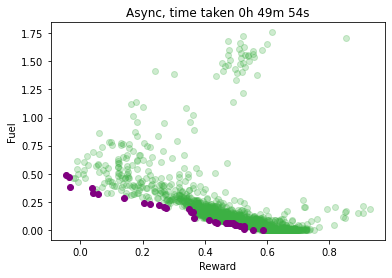

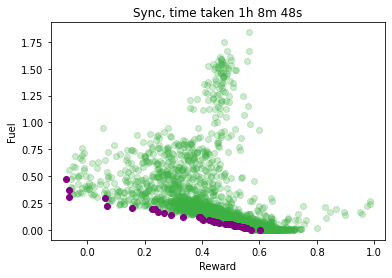

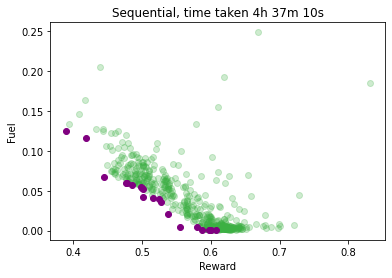

In [9]:
_, _, async_pareto = plot_mobo_points_in_obj_space(async_observations,
                              title=f"Async, time taken {get_time_string(async_time)}",
                              xlabel="Reward", ylabel="Fuel",
                              m_init="o", m_add="o",
                              c_pass='#3CB04340',
                              c_pareto='purple');
plt.savefig("lunar_lander/async.pdf")
_, _, sync_pareto = plot_mobo_points_in_obj_space(sync_observations,
                              title=f"Sync, time taken {get_time_string(sync_time)}",
                              xlabel="Reward", ylabel="Fuel",
                              m_init="o", m_add="o",
                              c_pass='#3CB04340',
                              c_pareto='purple');
plt.savefig("lunar_lander/sync.pdf")
_, _, ehvi_pareto = plot_mobo_points_in_obj_space(ehvi_observations,
                              title=f"Sequential, time taken {get_time_string(ehvi_time)}",
                              xlabel="Reward", ylabel="Fuel",
                              m_init="o", m_add="o",
                              c_pass='#3CB04340',
                              c_pareto='purple');
plt.savefig("lunar_lander/ehvi.pdf")

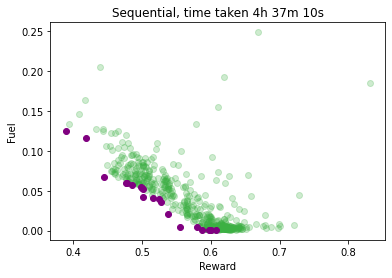

In [10]:
_, _, ehvi_pareto = plot_mobo_points_in_obj_space(ehvi_observations,
                              title=f"Sequential, time taken {get_time_string(ehvi_time)}",
                              xlabel="Reward", ylabel="Fuel",
                              m_init="o", m_add="o",
                              c_pass='#3CB04340',
                              c_pareto='purple');
plt.savefig("lunar_lander/ehvi.pdf")

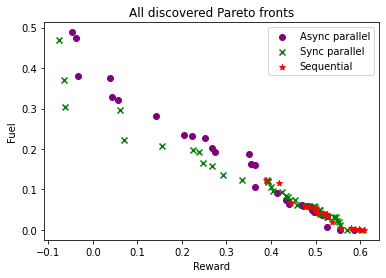

In [11]:
plt.scatter(async_pareto[:, 0], async_pareto[:, 1], c="purple", marker="o", label="Async parallel")
plt.scatter(sync_pareto[:, 0], sync_pareto[:, 1], c="green", marker="x", label="Sync parallel")
plt.scatter(ehvi_pareto[:, 0], ehvi_pareto[:, 1], c="red", marker="*", label="Sequential")
plt.xlabel("Reward")
plt.ylabel("Fuel")
plt.legend();
plt.title("All discovered Pareto fronts")
plt.savefig("lunar_lander/all_fronts.pdf")